<a href="https://colab.research.google.com/github/juanmggb/maestria/blob/main/parameter_estimation/parameter_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [1]:
pip install pyDOE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=935ce4f24ddece8455ff2886f5d27e7880bb60821f22f51764fe1c3f5699deb8
  Stored in directory: /root/.cache/pip/wheels/00/3e/fa/5705bf59c2053c17c4799c3ab66a2e356c32f40a3044fe2134
Successfully built pyDOE


In [2]:
pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15096 sha256=41be9f4b792a12e35ab47780d3984bdc542156be4aa17769e1735e289352e95c
  Stored in directory: /root/.cache/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout


In [3]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd  
import sys

In [4]:
# In order to access the package you need to have its path. The path required is the path WHERE that package is soterd, not it path
# sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [5]:
!git clone https://github.com/juanmggb/maestria.git

Cloning into 'maestria'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 288 (delta 38), reused 18 (delta 6), pack-reused 203
Receiving objects: 100% (288/288), 9.00 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [6]:
cd maestria

/content/maestria


In [7]:
import utilis.functions as fn
from utilis.models import monod_model


In [8]:
# Definir parametros 
mu_max = 1.2 # g/L
yxs = 0.2 
ks = 280 # g/L
ypx = 4 

In [9]:
# Definir condiciones iniciales 
x0 = np.array([0.2, 40, 0])
# Definir tiempo de integracion 
tf = 60 
dt = 1 
time = np.arange(0, tf+dt, dt)
# Simular ODEs
x, s, p = fn.euler(monod_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx).T

In [10]:
fn.final_conc(x, s, p)

(8.188387294636055, 0.0580635268197149, 31.953549178544236)

In [11]:
predicted = fn.create_df(time, x, s, p)
predicted.head()

,t,x,s,p
0,0,0.200000,40.000000,0.000000
1,1,0.230000,39.850000,0.120000
2,2,0.264387,39.678066,0.257547
3,3,0.303765,39.481174,0.415061
4,4,0.348812,39.255940,0.595248


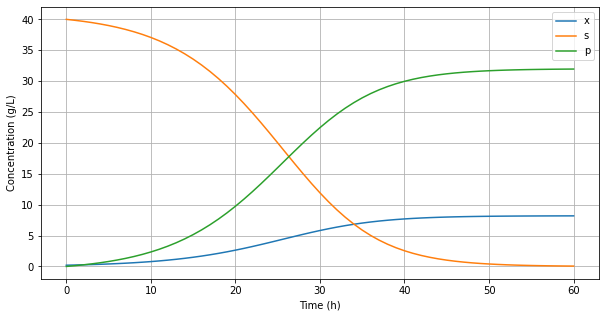

In [12]:
fn.plot_data(predicted)

In [13]:
predicted_noise = fn.add_noise(predicted, 0.1, 1, 1)

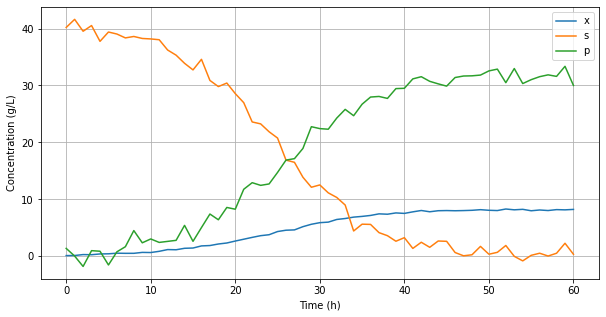

In [14]:
fn.plot_data(predicted_noise)

In [15]:
def fitness_function(parms):
    mu_max, yxs, ks, ypx = parms
    x, s, p = fn.euler(monod_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx).T
    out = fn.create_df(time, x, s, p)
    return fn.MSE(predicted_noise, out)

In [16]:
fitness_function([mu_max, yxs, ks, ypx])

2.123445152193694

In [17]:
# Configuramos algoritmo genetico
algorithm_param = {'max_num_iteration': 200,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [18]:
# Establecer los rangos de busqueda para las variables de decision
varbound=np.array([
    [0,3], # mu_max
    [0,1], # yxs
    [100,300], # ks
    [0,10] # ypx
])

In [19]:
# LLamar el algortimo genetico para realizar la optimizacion
model=ga(function=fitness_function,
         dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

 The best solution found:
 [9.42981052e-01 2.03406390e-01 2.14195888e+02 3.93652361e+00]

 Objective function:
 2.103665559982203


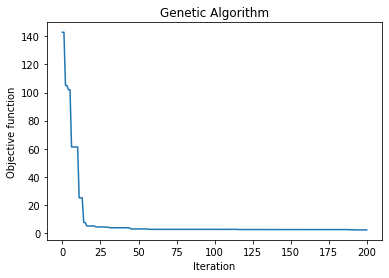

In [20]:
# Realizar la busqueda
model.run()

In [23]:
print("Minimun fitness value:")
print(model.best_function)

Minimun fitness value:
2.103665559982203


In [24]:
print('Best solution found:')
print("mu_max: ",round(model.best_variable[0], 2))
print("yxs: ",round(model.best_variable[1], 2))
print("ks: ",round(model.best_variable[2], 2))
print("ypx: ",round(model.best_variable[3], 2))

Best solution found:
mu_max:  0.94
yxs:  0.2
ks:  214.2
ypx:  3.94


mu_max = 1.2  g/L

yxs = 0.2 

ks = 280  g/L

ypx = 4 